<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/Load_nets%2Bwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras

# **30 НЕЙРОНОВ**

In [2]:
model = keras.models.load_model('/content/model_30n_2k.h5')

Точность растет очень медленно: на больших эпохах по несколько тысячных процента.

длина:
23520
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 164.00
Процентное точных нулей: 1.3946%
количество пороговых нулей (Т=0.0001): 13.00
Процентное точных нулей: 0.1105%
количество пороговых нулей (Т=0.00001): 1.00
Процентное точных нулей: 0.0085%


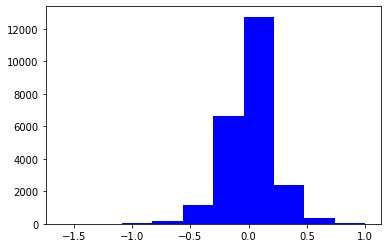

In [31]:
a = np.array(model.get_weights()[0]).flatten();
plt.hist(a, facecolor='blue')
#plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
#print("вектор:")
#print(a)
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/11760)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/11760)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/11760)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/11760)*100))

Мощности нейронов (Эвклидова норма)






In [61]:
weight_origin=model.layers[0].get_weights()[0] #ВХОД скрытого
weight_origin2=model.layers[1].get_weights()[0] #ВЫХОД скрытого
dense1 = model.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)

(784, 30)
(30, 10)


(23520,)
(300,)


hidden layer: max = 54.4782,
 min = 1.8905
dense max = 0.8238
dence min = -0.9595
[ 1.89054702  2.35963879  8.32148701 19.17352309 26.61289078 28.22432149
 28.04039136 31.71922631 36.69307616 37.34612527 47.81871426 51.73744063
 50.39631475 54.47819479 41.16764466 40.81402462 45.82458595 43.23499261
 36.16126912 44.99060723 43.09169659 33.25534153 32.05022001 35.18485066
 33.6005371  27.3107739  29.24453947 26.25368494 13.69268716  2.80055569]


out layer: max = 44.4430,
 min = 0.1851
[21.9113538  35.66510777 28.83020876 28.75640844 26.7164517  25.17972839
 28.04404922 44.44301765  0.1850625  28.37070378 33.06721981 33.0890194
 23.87529129 34.05091475 25.68953881 33.40847207 20.70693898 20.96691536
 29.23021885 31.30371809 34.73639047 30.09933203 30.05101826 30.53698311
 33.19573601 23.50183512 29.45505797 36.00363174 24.98203198 33.06076032]


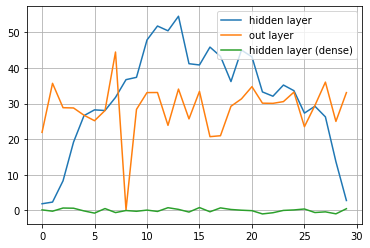

In [34]:
weight_origin=model.layers[0].get_weights()[0].flatten()
weight_origin2=model.layers[1].get_weights()[0].flatten()
dense1 = model.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)

layer1 = np.empty(30)
layer2 = np.empty(30)
x = range(30)

for i in range(30):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1
for i in range(30):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Находим среднее и дисперсию для каждого нейрона скрытого слоя

In [99]:
weight_origin=model.layers[0].get_weights()[0] #ВХОД скрытого
weight_origin2=model.layers[1].get_weights()[0] #ВЫХОД скрытого
dense1 = model.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#(30, 10) - 10 нейронов по 30 связей (будем использовать наоборот - 30 нейронов по 10 связей)
(y,z) = weight_origin2.shape

(784, 30)
(30, 10)


mean: 
[-0.01284574  0.00298404  0.00267602 -0.00069387  0.00034523  0.00795109
 -0.0011366   0.01519662 -0.0162037   0.01684933  0.00018928 -0.02522584
  0.00448839 -0.01109911 -0.00391689 -0.00778737 -0.0277978  -0.02411477
  0.01893089 -0.01976955  0.01699688  0.03286122 -0.00690215 -0.00395956
  0.02641452 -0.02209521  0.01167334  0.019124    0.02400524  0.00505682]
std (является квадратным корнем дисперии): 
[1.48019269 1.88851843 1.69794398 1.69577133 1.63451675 1.58679226
 1.67463536 2.10809652 0.13506921 1.68427633 1.8184394  1.81886379
 1.5451566  1.8452556  1.60279086 1.82778183 1.43872203 1.44779487
 1.70957992 1.76917523 1.8636926  1.73460465 1.73350924 1.74747896
 1.82177823 1.53287161 1.71620791 1.8973659  1.58038825 1.8182548 ]
Дисперсия: 
[2.19097039 3.56650186 2.88301375 2.8756404  2.67164499 2.51790967
 2.8044036  4.44407093 0.01824369 2.83678676 3.30672187 3.30826549
 2.3875089  3.40496822 2.56893853 3.34078643 2.06992108 2.09610998
 2.92266352 3.12998099 3.47335013 

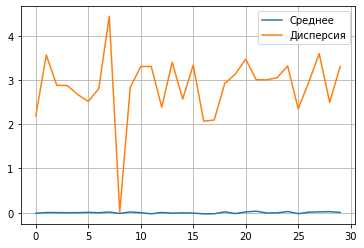

In [100]:
aver = np.empty(y) #средние значения (по строкам для выхода скрытого слоя)
disp = np.empty(y) #дисперсии (по строкам для выхода скрытого слоя)
x = range(y)
np.mean(weight_origin2, axis=1, out=aver)
print("mean: ")
print(aver)
np.std(weight_origin2, axis=1, out=disp)
print("std (является квадратным корнем дисперии): ")
print(disp)
print("Дисперсия: ")
print(disp*disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

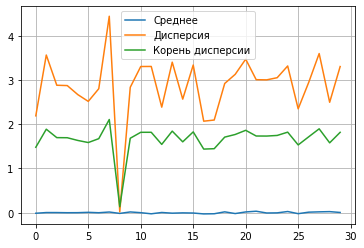

In [101]:
plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')
plt.plot(x,disp, label = u'Корень дисперсии')
plt.grid(True)
plt.legend()

In [88]:
T0 = -0.004
T1 = -0.002
small_aver0 = sum(aver <= T0)
small_aver1 = sum(aver <= T1)
print("Число нейронов с дисперсией меньше -0.004: ")
print(small_aver0)
print("Число нейронов с дисперсией меньше -0.002: ")
print(small_aver1)


Число нейронов с дисперсией меньше -0.004: 
10
Число нейронов с дисперсией меньше -0.002: 
12




---


Теперь увеличим число нейронов на скрытом слое (15 ->1 500).






# **1500 НЕЙРОНОВ**

In [4]:
model2 = keras.models.load_model('/content/model_1500.h5')

длина:
1176000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 18781.00
Процентное точных нулей: 1.5970%
количество пороговых нулей (Т=0.0001): 1850.00
Процентное точных нулей: 0.1573%
количество пороговых нулей (Т=0.00001): 165.00
Процентное точных нулей: 0.0140%


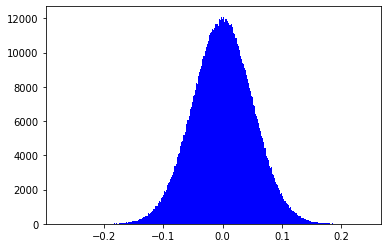

In [38]:
a = np.array(model2.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
##
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model2.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model2.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model2.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model2.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/1176000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/1176000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/1176000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/1176000)*100))

Мощности нейронов (Эвклидова норма)






(1176000,)
(15000,)


hidden layer: max = 2.3740,
 min = 1.6594
dense max = 0.0366
dence min = -0.0301
[1.88479436 1.98973761 1.86953125 ... 1.83090394 1.95462701 1.9795708 ]


out layer: max = 0.2060,
 min = 0.0066
[0.05030128 0.03896997 0.01179399 ... 0.07987593 0.20060178 0.04725998]


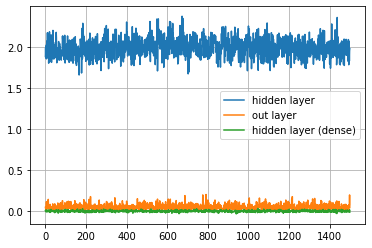

In [39]:
weight_origin=model2.layers[0].get_weights()[0].flatten()
weight_origin2=model2.layers[1].get_weights()[0].flatten()
dense1 = model2.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)

layer1 = np.empty(1500)
layer2 = np.empty(1500)
x = range(1500)

for i in range(1500):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(1500):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Находим среднее и дисперсию для каждого нейрона скрытого слоя

(784, 1500)
(1500, 10)
mean: 
[-0.01554803 -0.01534035 -0.00930502 ... -0.0356605   0.01963916
  0.02674144]
std (является квадратным корнем дисперии): 
[0.06919817 0.06051174 0.03305777 ... 0.08195073 0.14026575 0.06333161]
Дисперсия: 
[0.00478839 0.00366167 0.00109282 ... 0.00671592 0.01967448 0.00401089]


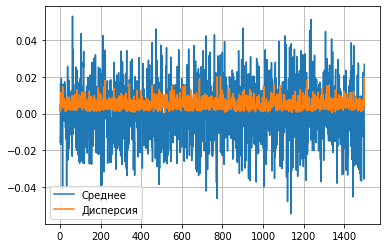

In [111]:
weight_origin=model2.layers[0].get_weights()[0] #ВХОД скрытого
weight_origin2=model2.layers[1].get_weights()[0] #ВЫХОД скрытого
dense1 = model2.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#(1500, 10) - 1500 нейронов по 30 связей
(y,z) = weight_origin2.shape

aver = np.empty(y) #средние значения (по строкам для выхода скрытого слоя)
disp = np.empty(y) #дисперсии (по строкам для выхода скрытого слоя)
x = range(y)
np.mean(weight_origin2, axis=1, out=aver)
print("mean: ")
print(aver)
np.std(weight_origin2, axis=1, out=disp)
print("std (является квадратным корнем дисперии): ")
print(disp)
print("Дисперсия: ")
print(disp*disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

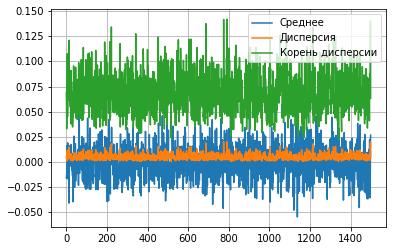

In [112]:
plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')
plt.plot(x,disp, label = u'Корень дисперсии')
plt.grid(True)
plt.legend()

In [113]:
T0 = -0.004
T1 = -0.002
small_aver0 = sum(aver <= T0)
small_aver1 = sum(aver <= T1)
print("Число нейронов с дисперсией меньше -0.004: ")
print(small_aver0)
print("Число нейронов с дисперсией меньше -0.002: ")
print(small_aver1)


Число нейронов с дисперсией меньше -0.004: 
598
Число нейронов с дисперсией меньше -0.002: 
669


#**5'000 НЕЙРОНОВ**

In [43]:
model3 = keras.models.load_model('/content/model_5000.h5')

длина:
3920000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 62401.00
Процентное точных нулей: 1.5919%
количество пороговых нулей (Т=0.0001): 6167.00
Процентное точных нулей: 0.1573%
количество пороговых нулей (Т=0.00001): 626.00
Процентное точных нулей: 0.0160%


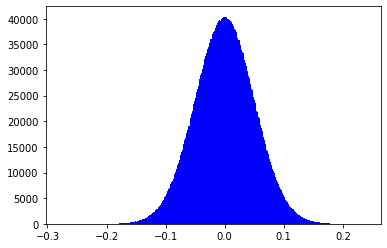

In [44]:
a = np.array(model3.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model3.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model3.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model3.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model3.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/3920000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/3920000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/3920000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/3920000)*100))

Мощности нейронов (Эвклидова норма)






(3920000,)
(50000,)


hidden layer: max = 2.3236,
 min = 1.6047
dense max = 0.0174
dence min = -0.0153
[1.82545609 2.0116223  2.04256276 ... 1.8100399  1.86900454 1.96694567]


out layer: max = 0.0966,
 min = 0.0029
[0.02239045 0.02284559 0.02564619 ... 0.01394684 0.04488281 0.0195635 ]


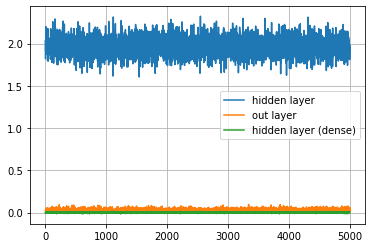

In [46]:
weight_origin=model3.layers[0].get_weights()[0].flatten()
weight_origin2=model3.layers[1].get_weights()[0].flatten()
dense1 = model3.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)

layer1 = np.empty(5000)
layer2 = np.empty(5000)
x = range(5000)


for i in range(5000):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(5000):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()


Находим среднее и дисперсию для каждого нейрона

(784, 5000)
(5000, 10)
mean: 
[-0.00642577  0.01133787  0.01834837 ...  0.00871823  0.02296424
 -0.01529267]
std (является квадратным корнем дисперии): 
[0.04688021 0.04643287 0.04720123 ... 0.03631359 0.06293588 0.04150282]
Дисперсия: 
[0.00219775 0.00215601 0.00222796 ... 0.00131868 0.00396093 0.00172248]


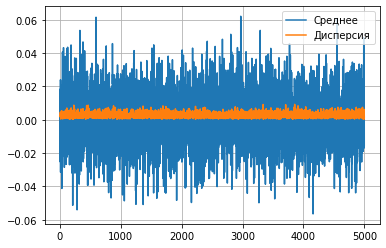

In [107]:
weight_origin=model3.layers[0].get_weights()[0] #ВХОД скрытого
weight_origin2=model3.layers[1].get_weights()[0] #ВЫХОД скрытого
dense1 = model3.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#(1500, 10) - 1500 нейронов по 30 связей
(y,z) = weight_origin2.shape

aver = np.empty(y) #средние значения (по строкам для выхода скрытого слоя)
disp = np.empty(y) #дисперсии (по строкам для выхода скрытого слоя)
x = range(y)
np.mean(weight_origin2, axis=1, out=aver)
print("mean: ")
print(aver)
np.std(weight_origin2, axis=1, out=disp)
print("std (является квадратным корнем дисперии): ")
print(disp)
print("Дисперсия: ")
print(disp*disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

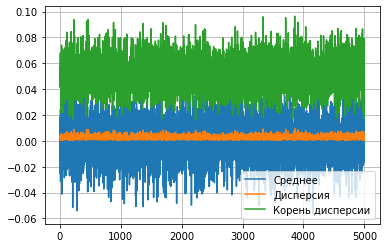

In [108]:
plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')
plt.plot(x,disp, label = u'Корень дисперсии')
plt.grid(True)
plt.legend()

In [110]:
T0 = -0.004
T1 = -0.002
small_aver0 = sum(aver <= T0)
small_aver1 = sum(aver <= T1)
print("Число нейронов с дисперсией меньше -0.004: ")
print(small_aver0)
print("Число нейронов с дисперсией меньше -0.002: ")
print(small_aver1)


Число нейронов с дисперсией меньше -0.004: 
2001
Число нейронов с дисперсией меньше -0.002: 
2234


# **10'000 НЕЙРОНОВ**

In [6]:
model4 = keras.models.load_model('/content/model_10000.h5')

длина:
7840000
количество точных нулей: 0.00
Процентное точных нулей: 0.00%
количество пороговых нулей (Т=0.001): 124406.00
Процентное точных нулей: 3.1736%
количество пороговых нулей (Т=0.0001): 12441.00
Процентное точных нулей: 0.3174%
количество пороговых нулей (Т=0.00001): 1237.00
Процентное точных нулей: 0.0316%


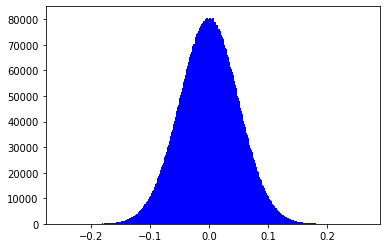

In [58]:
a = np.array(model4.get_weights()[0]).flatten();
plt.hist(a, bins=400, facecolor='blue')
print("длина:")
print(len(a))
T0 = 0.001
T1 = 0.0001
T2 = 0.00001
zerj_num = sum(model4.get_weights()[0].flatten() == 0)
zero_num_under0 = sum(abs(model4.get_weights()[0].flatten()) <= T0)
zero_num_under1 = sum(abs(model4.get_weights()[0].flatten()) <= T1)
zero_num_under2 = sum(abs(model4.get_weights()[0].flatten()) <= T2)
print("количество точных нулей: %.2f" % (zerj_num))
print("Процентное точных нулей: %.2f%%" % ((zerj_num/3920000)*100))
print("количество пороговых нулей (Т=0.001): %.2f" % (zero_num_under0))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under0/3920000)*100))
print("количество пороговых нулей (Т=0.0001): %.2f" % (zero_num_under1))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under1/3920000)*100))
print("количество пороговых нулей (Т=0.00001): %.2f" % (zero_num_under2))
print("Процентное точных нулей: %.4f%%" % ((zero_num_under2/3920000)*100))

Мощности нейронов (Эвклидова норма)






(7840000,)
(100000,)


hidden layer: max = 2.3554,
 min = 1.6038
dense max = 0.0127
dence min = -0.0142
[1.74458099 1.98619869 1.88939649 ... 1.79788427 1.92092357 1.86207765]


out layer: max = 0.1037,
 min = 0.0027
[0.02950422 0.01537902 0.04230055 ... 0.02875273 0.06504335 0.02329988]


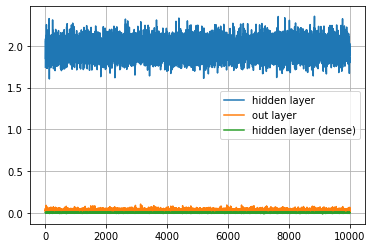

In [115]:
weight_origin=model4.layers[0].get_weights()[0].flatten()
weight_origin2=model4.layers[1].get_weights()[0].flatten()
dense1 = model4.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)

layer1 = np.empty(10000)
layer2 = np.empty(10000)
x = range(10000)


for i in range(10000):
  sum1 = 0
  for j in range(784):
    sum1 = sum1 + weight_origin[i*784 + j]*weight_origin[i*784 + j]
  layer1[i] = sum1

for i in range(10000):
  sum2 = 0
  for j in range(10):
    sum2 = sum2 + weight_origin2[i*10 + j]*weight_origin2[i*10 + j]
  layer2[i] = sum2

print("\n")
print("hidden layer: max = %.4f," % (layer1.max()))
print(" min = %.4f" % (layer1.min()))
print("dense max = %.4f" % (dense1.max()))
print("dence min = %.4f" % (dense1.min()))
print(layer1)
print("\n")
print("out layer: max = %.4f," % (layer2.max()))
print(" min = %.4f" % (layer2.min()))
print(layer2)
plt.plot(x,layer1, label = u'hidden layer')
plt.plot(x,layer2, label = u'out layer')
plt.plot(x,dense1, label = u'hidden layer (dense)')

plt.grid(True)
plt.legend()

Находим среднее и дисперсию для каждого нейрона

(784, 10000)
(10000, 10)
mean: 
[-0.02247212 -0.0002923   0.01485965 ...  0.01759133 -0.04549997
 -0.0210712 ]
std (является квадратным корнем дисперии): 
[0.04945125 0.03921501 0.0633186  ... 0.05065391 0.06658894 0.04342801]
Дисперсия: 
[0.00244543 0.00153782 0.00400925 ... 0.00256582 0.00443409 0.00188599]


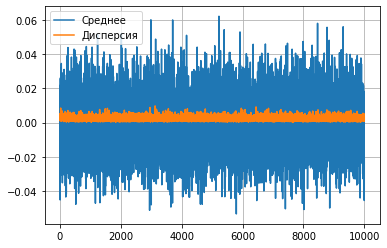

In [116]:
weight_origin=model4.layers[0].get_weights()[0] #ВХОД скрытого
weight_origin2=model4.layers[1].get_weights()[0] #ВЫХОД скрытого
dense1 = model4.layers[0].get_weights()[1]
#уточнить длину
print(weight_origin.shape)
print(weight_origin2.shape)
#(1500, 10) - 1500 нейронов по 30 связей
(y,z) = weight_origin2.shape

aver = np.empty(y) #средние значения (по строкам для выхода скрытого слоя)
disp = np.empty(y) #дисперсии (по строкам для выхода скрытого слоя)
x = range(y)
np.mean(weight_origin2, axis=1, out=aver)
print("mean: ")
print(aver)
np.std(weight_origin2, axis=1, out=disp)
print("std (является квадратным корнем дисперии): ")
print(disp)
print("Дисперсия: ")
print(disp*disp)

plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')

plt.grid(True)
plt.legend()

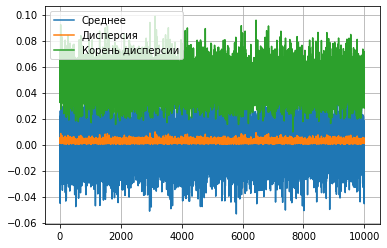

In [117]:
plt.plot(x,aver, label = u'Среднее')
plt.plot(x,disp*disp, label = u'Дисперсия')
plt.plot(x,disp, label = u'Корень дисперсии')
plt.grid(True)
plt.legend()